In [36]:
from keras.layers import Input, Dense
from keras import losses
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt 
import numpy as np 

#from tensorflow import keras 
#import tensorflow as tf

In [28]:
(x_train,_),(x_test,_) = mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape(x_train.shape[0],784)
x_test = x_test.reshape(x_test.shape[0],784)


In [29]:
encoding_dim = 32
input_imgs = Input(shape=(784,))
encoder_img= Dense(encoding_dim, activation='relu')(input_imgs)
decoder_img= Dense(784, activation='sigmoid')(encoder_img)

encoder = Model(input_imgs, encoder_img)
autoencoder = Model(input_imgs, decoder_img)

In [52]:
autoencoder.compile(optimizer ='adadelta', loss ='binary_crossentropy',
                  metrics=['accuracy'])

In [30]:
autoencoder.compile(optimizer ='Adam', loss =losses.MeanSquaredError())
                  #metrics=['accuracy'])

In [53]:
n=50 
hist=autoencoder.fit(x_train, x_train, epochs = n, batch_size=256, shuffle =True,
                    validation_data=(x_test,x_test))
loss=hist.history['loss']
accuracy=hist.history['accuracy']
print('training Loss=',loss[n-1], 'training Accuracy=', accuracy[n-1])


Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0918 - accuracy: 0.0121 - val_loss: 0.0909 - val_accuracy: 0.0128
Epoch 2/50
235/235 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.0115 - val_loss: 0.0909 - val_accuracy: 0.0129
Epoch 3/50
235/235 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.0112 - val_loss: 0.0909 - val_accuracy: 0.0130
Epoch 4/50
235/235 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.0118 - val_loss: 0.0909 - val_accuracy: 0.0130
Epoch 5/50
235/235 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.0123 - val_loss: 0.0909 - val_accuracy: 0.0130
Epoch 6/50
235/235 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.0115 - val_loss: 0.0909 - val_accuracy: 0.0131
Epoch 7/50
235/235 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.0131 - val_loss: 0.0908 - val_accuracy: 0.0134
Epoch 

In [54]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)
print('\n Encoded Image Data =',encoded_imgs[1])



 Encoded Image Data = [ 5.7641897  12.914411    8.205729    5.5875726   5.2786837  11.396523
  2.7982335   9.708956   12.168751    6.4316907   8.827019    1.1957786
  4.8104177   9.024109    0.40626168  9.36697     3.2561011  10.048044
  7.8111353   1.4783278   2.6560116   5.8017282  11.322936    4.27249
  7.6809535   7.488422   17.425068    4.4502783   5.649187    6.6848555
  8.829265    3.7067797 ]


In [55]:
xt=np.arange(len(loss))
plt.figure(1)
plt.plot(xt,loss,marker=".",c='red', label ='Loss')
plt.plot(xt,accuracy,marker='.',c ='blue',label='Acc')
plt.legend(loc='center right'); plt.grid()
plt.xlabel('epoch');plt.ylabel('Loss and Accuracy')

AttributeError: 'int' object has no attribute 'arange'

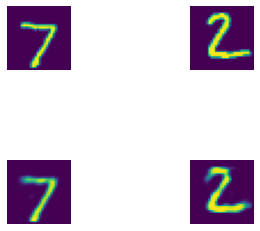

In [48]:
np=2  # 몇 개의 숫자를 나타낼 것인지
plt.figure(2)
for i in range(np):
    ax = plt.subplot(3, np, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.axis('off')
    
    # 재구성된 데이터
    #ax = plt.subplot(3, np, i + 1 + np)
    #plt.imshow(encoded_imgs[i].reshape(28, 28))
    #plt.axis('off')
    
    ax = plt.subplot(3, np, i + 1+2*np)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.axis('off')
       
plt.show()